# LFV Higgs decays in SeeSaw model ( Thao et al results) First numeric results no compatibles con seesaw new discussions.

## In this notebook we use the mpmath implementations of PaVe functions

In [1]:
from sympy import init_printing, Symbol,lambdify, symbols
init_printing()
import OneLoopLFVHD as lfvhd

{m1, m_a, m2}


In [2]:
from seesaw_FF import TrianglesOneFermion, TrianglesTwoFermion, Bubbles
from seesaw_FF import g, mW, Uν, Uνc, mn, m, C, Cc, a,b,i,j,h
from seesaw_FF import j as jj

In [3]:
import matplotlib.pyplot as plt
%matplotlib inline

In [4]:
from mpmath import *

In [5]:
mp.dps = 80; mp.pretty = True

In [35]:
import numpy as np

## Numeric implementation of form factors

**Neutrino benchmark** is given by 

In [36]:
from OneLoopLFVHD.neutrinos import NuOscObservables
Nudata = NuOscObservables

In [37]:
m1 = 1e-12  #GeV 

#current values to Square mass differences
d21 = Nudata.squareDm21.central*1e-18# factor to convert eV^2 to GeV^2
d31 = Nudata.squareDm31.central*1e-18

#d21 = 7.5e-5*1e-18
#d31 = 2.457e-3*1e-18
m2 = sqrt(m1**2 + d21)
m3 = sqrt(m1**2 + d31)

m4 = lambda m6: m6/3
m5 = lambda m6: m6/2

### Form factor with one fermion in the loop.

#### AL one fermion 

In [38]:
from OneLoopLFVHD.data import ml

In [39]:
def GIM_One(exp):
    from sympy import Add
    args = exp.expand().args
    func = exp.expand().func
    if isinstance(func,Add):
        X = Add(*[t for t in args if t.has(mni)]).simplify()
    else:
        X = exp
    #X1 = X.collect([mni],evaluate=False)
    return X#mni**2*X1[mni**2]

In [66]:
#from numba import jit,njit

In [67]:
#@jit(cache=True)
def sumOne(m6,ALab,a,b): 
    m1 = 1e-12  
    d21 = Nudata.squareDm21.central*1e-18# este último factor convierte eV^2 a GeV^2
    d31 = Nudata.squareDm31.central*1e-18

    #d21 = 7.5e-5*1e-18
    #d31 = 2.457e-3*1e-18
    m2 = sqrt(m1**2 + d21)
    m3 = sqrt(m1**2 + d31)
    mnk = (m1,m2,m3,m6/3,m6/2,m6)
    AL = 0 
    for i in range(1,7):
        AL += ALab(mnk[i-1],Unu(mnk[0],mnk[-1],b,i),conj(Unu(mnk[0],mnk[-1],a,i)))
        #AL += L#np.nan_to_num(L)
    return AL


In [68]:
mh,ma,mb = symbols('m_h,m_a,m_b',real=True)
valores ={mW:80.379,mh:125.10,g:(2*80.379)/(246)}

cambios_hab = lambda a,b:{lfvhd.ma:valores[mh],lfvhd.mi:ml[a],lfvhd.mj:ml[b]}


Ubi, Ucai,mni = symbols('U_{bi}, {{U_{ai}^*}},m_{n_i}')
UnuOne = {mn[i]:mni,Uν[b,i]:Ubi,Uνc[a,i]:Ucai}

from Unu_seesaw import Unu, Cij, Unusym, Cijsym

In [69]:
from OneLoopLFVHD.data import replaceBs, pave_functions

In [70]:
def numeric_sum_diagramsOne(a,b,quirality='L'):
    FdiagOneFer = []
    for Set in [TrianglesOneFermion,Bubbles]:
        for dia in Set:
            if quirality=='L':
                x = GIM_One(dia.AL().subs(lfvhd.D,4).subs(cambios_hab(a,b)).subs(valores).subs(UnuOne))
            elif quirality=='R':
                x = GIM_One(dia.AR().subs(lfvhd.D,4).subs(cambios_hab(a,b)).subs(valores).subs(UnuOne))
            else:
                raise ValueError('quirality must be L or R')
            f = lambdify([mni,Ubi,Ucai],replaceBs(x),
                         modules=[pave_functions(valores[mh],a,b,lib='mpmath'),'mpmath'])
            fsum = lambda m6:sumOne(m6,f,a,b)
            FdiagOneFer.append(fsum)
    return lambda m6: sum(f(m6) for f in FdiagOneFer)

In [71]:
ALOneTot23_det = numeric_sum_diagramsOne(2,3,quirality='L')

In [72]:
ALOneTot23_det(1e-10)

(0.000000000000060511692576719552985581064412949739427221292941828569800156794376495522022963222 + 9.1432473131398862506504235502158945891234704986359286516333960442202866297656964e-94j)

In [73]:
#a = 2, b = 3
ALOneTot23 = numeric_sum_diagramsOne(2,3,quirality='L')
AROneTot23 = numeric_sum_diagramsOne(2,3,quirality='R')

#a = 3, b = 2
ALOneTot32 = numeric_sum_diagramsOne(3,2,quirality='L')
AROneTot32 = numeric_sum_diagramsOne(3,2,quirality='R')

#a = 1, b = 3
ALOneTot13 = numeric_sum_diagramsOne(1,3,quirality='L')
AROneTot13 = numeric_sum_diagramsOne(1,3,quirality='R')

#a = 3, b = 1
ALOneTot31 = numeric_sum_diagramsOne(3,1,quirality='L')
AROneTot31 = numeric_sum_diagramsOne(3,1,quirality='R')

#a = 1, b = 2
ALOneTot12 = numeric_sum_diagramsOne(1,2,quirality='L')
AROneTot12 = numeric_sum_diagramsOne(1,2,quirality='R')

#a = 2, b = 1
ALOneTot21 = numeric_sum_diagramsOne(2,1,quirality='L')
AROneTot21 = numeric_sum_diagramsOne(2,1,quirality='R')

In [49]:
#n = 100
#m6np = np.logspace(-12,8,n)

#YLOne23 = np.array([np.abs(ALOneTot23(m6)) for m6 in m6np])
#YLOne32 = np.array([np.abs(ALOneTot32(m6))for m6 in m6np])

#YLOne13 = np.array([np.abs(ALOneTot13(m6))for m6 in m6np])
#YLOne31 = np.array([np.abs(ALOneTot31(m6))for m6 in m6np])

#YLOne12 = np.array([np.abs(ALOneTot12(m6))for m6 in m6np])
#YLOne21 = np.array([np.abs(ALOneTot21(m6))for m6 in m6np])

In [51]:
#plt.figure(figsize=(15,8))
#plt.loglog(np.real(m6np),YLOne23,'-.',label='$A_L^{(1)}(2,3)$')
#plt.loglog(np.real(m6np),YLOne32,'--',label='$A_L^{(1)}(3,2)$')

#plt.loglog(np.real(m6np),YLOne13,'-.',label='$A_L^{(1)}(1,3)$')
#plt.loglog(np.real(m6np),YLOne31,'--',label='$A_L^{(1)}(3,1)$')

#plt.loglog(np.real(m6np),YLOne12,'-.',label='$A_L^{(1)}(1,2)$')
#plt.loglog(np.real(m6np),YLOne21,'--',label='$A_L^{(1)}(2,1)$')
#plt.xticks(fontsize=15)
#plt.yticks(fontsize=15)

#plt.legend(fontsize=15)

### Form factor with two fermion in the loop.

In [74]:
def sumTwo(m6,ALab,a,b):
    AL = 0  
    mnk = (m1,m2,m3,m4(m6),m5(m6),m6)
    for i in range(1,4):
        for j in range(4,7):
            L = ALab(mnk[i-1],mnk[j-i],Unu(mnk[0],mnk[-1],b,j),conj(Unu(mnk[0],mnk[-1],a,i)),
                      Cij(mnk[0],mnk[-1],i,j),conj(Cij(mnk[0],mnk[-1],i,j)))
            if mp.isnan(L):
                print(mnk[i-1],mnk[j-i],Unu(mnk[0],mnk[-1],b,j),Cij(mnk[0],mnk[-1],i,j),L)
            AL += L
    return AL

In [75]:
mnj = symbols('m_{n_j}',positive=True)
Cijs, Cijcs, Ubj = symbols('C_{ij}, {{C_{ij}^*}},U_{bj}')
UnuTwo = {mn[i]:mni,mn[jj]:mnj,C[i,jj]:Cijs, Cc[i,jj]:Cijcs, Uν[b,jj]:Ubj, Uνc[a,i]:Ucai}
UnuTwo

In [76]:
def numeric_sum_diagramsTwo(aa,bb,quirality='L'):
    FdiagTwoFer = []
    for dia in TrianglesTwoFermion:
        if quirality=='L':
            x = dia.AL().subs(lfvhd.D,4).subs(cambios_hab(aa,bb)).subs(valores).subs(UnuTwo)
        elif quirality=='R':
            x = dia.AR().subs(lfvhd.D,4).subs(cambios_hab(aa,bb)).subs(valores).subs(UnuTwo)
        else:
            raise ValueError('quirality must be L or R')
        f = lambdify([mni,mnj,Ubj,Ucai,Cijs,Cijcs],replaceBs(x),
                     modules=[pave_functions(valores[mh],aa,bb,lib='mpmath'),'mpmath'] )
        
        fsum = lambda m6:sumTwo(m6,f,aa,bb)
        FdiagTwoFer.append(fsum)
    return lambda m6: sum(f(m6) for f in FdiagTwoFer)

In [77]:
# a = 2, b = 3
ALTwoTot23 = numeric_sum_diagramsTwo(2,3,quirality='L')
ARTwoTot23 = numeric_sum_diagramsTwo(2,3,quirality='R')

# a = 3, b = 2
ALTwoTot32 = numeric_sum_diagramsTwo(3,2,quirality='L')
ARTwoTot32 = numeric_sum_diagramsTwo(3,2,quirality='R')

# a = 1, b = 3
ALTwoTot13 = numeric_sum_diagramsTwo(1,3,quirality='L')
ARTwoTot13 = numeric_sum_diagramsTwo(1,3,quirality='R')

# a = 3, b = 1
ALTwoTot31 = numeric_sum_diagramsTwo(3,1,quirality='L')
ARTwoTot31 = numeric_sum_diagramsTwo(3,1,quirality='R')

# a = 1, b = 2
ALTwoTot12 = numeric_sum_diagramsTwo(1,2,quirality='L')
ARTwoTot12 = numeric_sum_diagramsTwo(1,2,quirality='R')

# a = 2, b = 1
ALTwoTot21 = numeric_sum_diagramsTwo(2,1,quirality='L')
ARTwoTot21 = numeric_sum_diagramsTwo(2,1,quirality='R')

In [78]:
n = 100
m6np = np.logspace(-10,15,n)

YLTwo23 = np.array([np.abs(ALTwoTot23(m6)) for m6 in m6np])
YLTwo32 = np.array([np.abs(ARTwoTot32(m6)) for m6 in m6np])

YLTwo13 = np.array([np.abs(ALTwoTot13(m6)) for m6 in m6np])
YLTwo31 = np.array([np.abs(ARTwoTot31(m6)) for m6 in m6np])

YLTwo12 = np.array([np.abs(ALTwoTot12(m6)) for m6 in m6np])
YLTwo21 = np.array([np.abs(ARTwoTot21(m6)) for m6 in m6np])

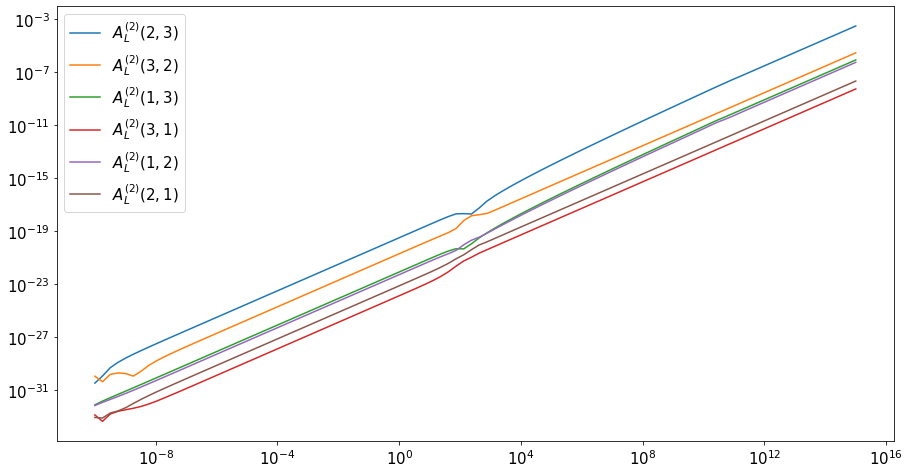

In [81]:
plt.figure(figsize=(15,8))

plt.loglog(np.real(m6np),YLTwo23,label='$A_L^{(2)}(2,3)$')
plt.loglog(np.real(m6np),YLTwo32,label='$A_L^{(2)}(3,2)$')

plt.loglog(np.real(m6np),YLTwo13,label='$A_L^{(2)}(1,3)$')
plt.loglog(np.real(m6np),YLTwo31,label='$A_L^{(2)}(3,1)$')

plt.loglog(np.real(m6np),YLTwo12,label='$A_L^{(2)}(1,2)$')
plt.loglog(np.real(m6np),YLTwo21,label='$A_L^{(2)}(2,1)$')
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)

plt.legend(fontsize=15)

## Total Form Factors

In [82]:
#a = 2, b = 3
ALtot23 =lambda m6: ALOneTot23(m6) + ALTwoTot23(m6)
ARtot23 =lambda m6: AROneTot23(m6) + ARTwoTot23(m6)

#a = 3, b = 2
ALtot32 =lambda m6: ALOneTot32(m6) + ALTwoTot32(m6)
ARtot32 =lambda m6: AROneTot32(m6) + ARTwoTot32(m6)

#a = 1, b = 3
ALtot13 =lambda m6: ALOneTot13(m6) + ALTwoTot13(m6)
ARtot13 =lambda m6: AROneTot13(m6) + ARTwoTot13(m6)

#a = 3, b = 1
ALtot31 =lambda m6: ALOneTot31(m6) + ALTwoTot31(m6)
ARtot31 =lambda m6: AROneTot31(m6) + ARTwoTot31(m6)

#a = 1, b = 2
ALtot12 =lambda m6: ALOneTot12(m6) + ALTwoTot12(m6)
ARtot12 =lambda m6: AROneTot12(m6) + ARTwoTot12(m6)

#a = 2, b = 1
ALtot21 =lambda m6: ALOneTot21(m6) + ALTwoTot21(m6)
ARtot21 =lambda m6: AROneTot21(m6) + ARTwoTot21(m6)

## Width decay of $h \to e_a e_b$

In [83]:
#from OneLoopLFVHD import Γhlilj

In [86]:
#n = 100
#m6np = np.logspace(-1,15,n)

In [88]:
#YW23 = np.array([Γhlilj(ALtot23(m6),ARtot23(m6),valores[mh],ml[2],ml[3]) for m6 in m6np])
#YW32 = np.array([Γhlilj(ALtot32(m6),ARtot32(m6),valores[mh],ml[3],ml[2]) for m6 in m6np])

#YW13 = np.array([Γhlilj(ALtot13(m6),ARtot13(m6),valores[mh],ml[1],ml[3]) for m6 in m6np])
#YW31 = np.array([Γhlilj(ALtot31(m6),ARtot31(m6),valores[mh],ml[3],ml[1]) for m6 in m6np])

#YW12 = np.array([Γhlilj(ALtot12(m6),ARtot12(m6),valores[mh],ml[1],ml[2]) for m6 in m6np])
#YW21 = np.array([Γhlilj(ALtot21(m6),ARtot21(m6),valores[mh],ml[2],ml[1]) for m6 in m6np])

In [89]:
Γhlilj = lambda mh,AL,AR: mh/(8*pi)*(abs(AL)**2 + abs(AR)**2)

In [90]:
n = 100
m6np = np.logspace(-1,15,n)

YW23 = np.array([Γhlilj(valores[mh],ALtot23(m6),ARtot23(m6)) for m6 in m6np])
YW32 = np.array([Γhlilj(valores[mh],ALtot32(m6),ARtot32(m6)) for m6 in m6np])

YW13 = np.array([Γhlilj(valores[mh],ALtot13(m6),ARtot13(m6)) for m6 in m6np])
YW31 = np.array([Γhlilj(valores[mh],ALtot31(m6),ARtot31(m6)) for m6 in m6np])

YW12 = np.array([Γhlilj(valores[mh],ALtot12(m6),ARtot12(m6)) for m6 in m6np])
YW21 = np.array([Γhlilj(valores[mh],ALtot21(m6),ARtot21(m6)) for m6 in m6np])

In [91]:
Wtot = YW23 + YW13 + YW12 + 0.0032 + YW32 + YW31 + YW21

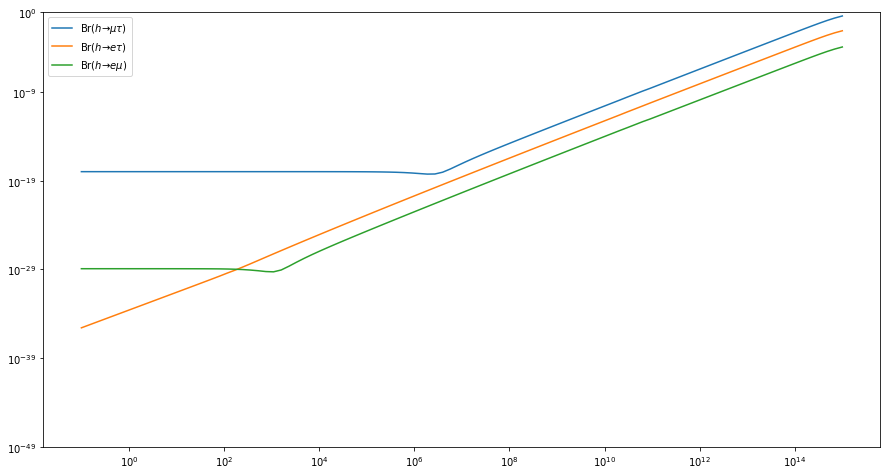

In [94]:
plt.figure(figsize=(15,8))
plt.loglog(np.real(m6np),(YW23 + YW32
                         )/Wtot,label=r'Br($h \to \mu \tau$)')
plt.loglog(np.real(m6np),(YW13 + YW31
                         )/Wtot,label=r'Br($h \to e \tau$)')
plt.loglog(np.real(m6np),(YW12 + YW21
                         )/Wtot,label=r'Br($h \to e \mu$)')
#plt.vlines(ml[1],1e-49,1e-9,colors='b')
plt.ylim(1e-49,1e-9)
plt.yticks([1e-49,1e-39,1e-29,1e-19,1e-9,1])
plt.legend()

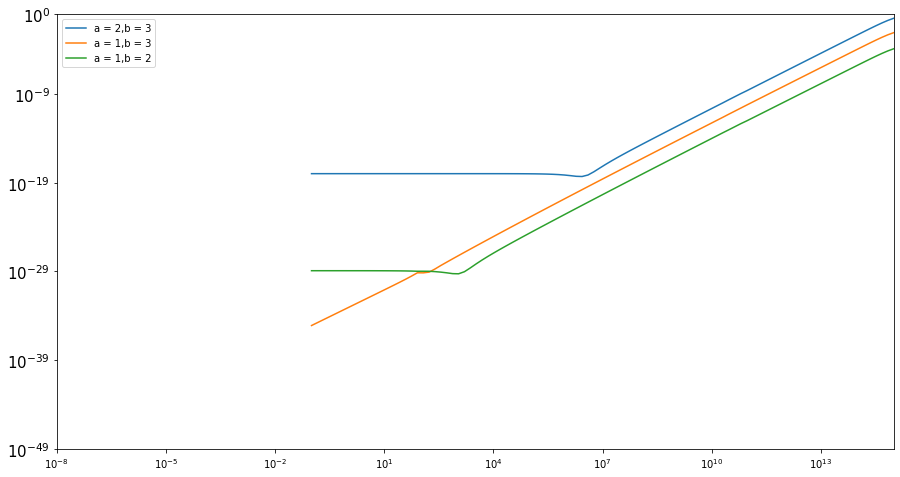

In [146]:
plt.figure(figsize=(15,8))
plt.loglog(np.real(m6np),(YW23 + YW32)/Wtot,label='a = 2,b = 3')
plt.loglog(np.real(m6np),(YW13 + YW31)/Wtot,label='a = 1,b = 3')
plt.loglog(np.real(m6np),(YW12 + YW21)/Wtot,label='a = 1,b = 2')
#plt.vlines((125.1-80.379)**2,1e-49,1e1,colors='b')
plt.ylim(1e-49,1)
plt.xlim(1e-8,1e15)
plt.yticks([1e-49,1e-39,1e-29,1e-19,1e-9,1],fontsize=15)
#plt.xticks([1e-10,1e-8,1e-6,1e-4,ml[1],1e-2,ml[2],1,1e2,(125.1-80.379)**2,1e4],
#          ['$10^{-10}$','$10^{-8}$','$10^{-6}$','$10^{-4}$','$m_e$','$10^{-2}$',r'$m_{\mu}$',
#           '$10^{0}$','$10^{2}$','$(m_{hw})^2$','$10^{4}$'],fontsize=15)
plt.legend()

In [85]:
ml

In [147]:
import pandas as pd

In [148]:
df = pd.DataFrame({'m6':m6np,'Whl2l3':YW23,'Whl3l2':YW32,'Whl1l3':YW13,'Whl3l1':YW31,
                   'Whl1l2':YW12,'Whl2l1':YW21})

In [149]:
df.to_csv('LFVHD.txt',sep='\t')

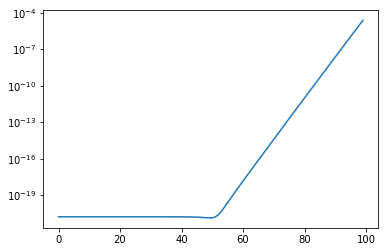

In [150]:
plt.semilogy(np.array(list(map(mpf,df['Whl2l3']))))

Adding Higgs decays to heavy neutrinos

In [120]:
no_nan = lambda x: not mp.isnan(x) 
cond_nan = np.array(list(map(no_nan,BR23)))